In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~`


In [2]:
Pkg.add(["Plots", "Optimization", "OptimizationOptimJL", "ForwardDiff"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`


In [3]:
using Plots, Optimization, OptimizationOptimJL, ForwardDiff

In [4]:
#function x^2 + 3y^2
fquad(u, p) = u[1]^2 + 3 * u[2]^2

fquad (generic function with 1 method)

In [5]:
#store intermediate points
path = []

#callback function to collect the path
function callback_func(state, obj_value)
    global path
    push!(path, copy(state.u))  
    return false 
end

callback_func (generic function with 1 method)

In [6]:
#initial guess
x0 = [3.0, 2.0]  #starting point for the optimization

#no parameters (p) 
p = nothing

optf = OptimizationFunction(fquad, AutoForwardDiff())
prob = OptimizationProblem(optf, x0, p)

OptimizationProblem. In-place: true
u0: 2-element Vector{Float64}:
 3.0
 2.0

In [7]:
#gradient descent using the GradientDescent optimizer
result = solve(prob, GradientDescent(), callback = callback_func)

retcode: Success
u: 2-element Vector{Float64}:
  1.6114282515494192e-9
 -2.6857137525823675e-10

In [8]:
#print the optimal solution
println("Optimal solution: ", result.u)

Optimal solution: [1.6114282515494192e-9, -2.6857137525823675e-10]


In [9]:
h = 0.5
xs = collect(-6:h:6)
ys = collect(-6:h:6)

25-element Vector{Float64}:
 -6.0
 -5.5
 -5.0
 -4.5
 -4.0
 -3.5
 -3.0
 -2.5
 -2.0
 -1.5
 -1.0
 -0.5
  0.0
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  5.0
  5.5
  6.0

In [10]:
#create the grid for contour plotting
X = [x for x in xs for _ in ys]
Y = [y for _ in xs for y in ys]
Z = [fquad([x, y], p) for x in xs, y in ys]

25×25 Matrix{Float64}:
 144.0   126.75  111.0   96.75  84.0   …  96.75  111.0   126.75  144.0
 138.25  121.0   105.25  91.0   78.25     91.0   105.25  121.0   138.25
 133.0   115.75  100.0   85.75  73.0      85.75  100.0   115.75  133.0
 128.25  111.0    95.25  81.0   68.25     81.0    95.25  111.0   128.25
 124.0   106.75   91.0   76.75  64.0      76.75   91.0   106.75  124.0
 120.25  103.0    87.25  73.0   60.25  …  73.0    87.25  103.0   120.25
 117.0    99.75   84.0   69.75  57.0      69.75   84.0    99.75  117.0
 114.25   97.0    81.25  67.0   54.25     67.0    81.25   97.0   114.25
 112.0    94.75   79.0   64.75  52.0      64.75   79.0    94.75  112.0
 110.25   93.0    77.25  63.0   50.25     63.0    77.25   93.0   110.25
 109.0    91.75   76.0   61.75  49.0   …  61.75   76.0    91.75  109.0
 108.25   91.0    75.25  61.0   48.25     61.0    75.25   91.0   108.25
 108.0    90.75   75.0   60.75  48.0      60.75   75.0    90.75  108.0
 108.25   91.0    75.25  61.0   48.25     61.0  

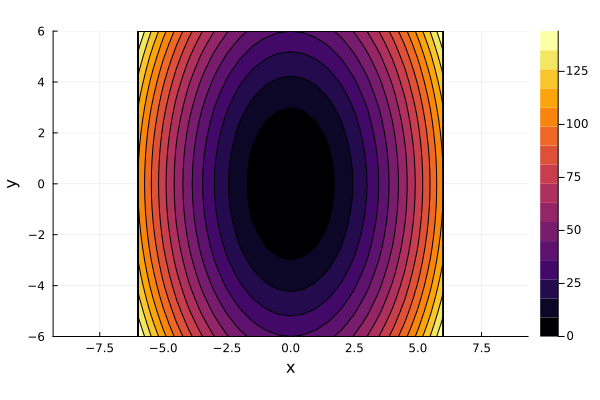

In [11]:
#Contour plot
contourf(xs, ys, Z, xlabel = "x", ylabel = "y", zlabel = "fquad", aspect_ratio = 1)

In [12]:
#get the x and y coordinates from the path
xc = [p[1] for p in path]
yc = [p[2] for p in path]

26-element Vector{Float64}:
  2.0
 -0.30769230769230793
  0.3516483516483516
 -0.05409974640743881
  0.06182828160850144
 -0.00951204332438485
  0.010870906656439826
 -0.0016724471779138213
  0.0019113682033300794
 -0.00029405664666616723
  0.0003360647390470475
 -5.170226754569983e-5
  5.9088305766513984e-5
 -9.090508579463722e-6
  1.038915266224424e-5
 -1.598331178806813e-6
  1.826664204350639e-6
 -2.810252622077923e-7
  3.21171728237476e-7
 -4.9411035113458064e-8
  5.6469754415380586e-8
 -8.687654525443184e-9
  9.928748029077918e-9
 -1.52749969678122e-9
  1.7457139391785356e-9
 -2.6857137525823675e-10

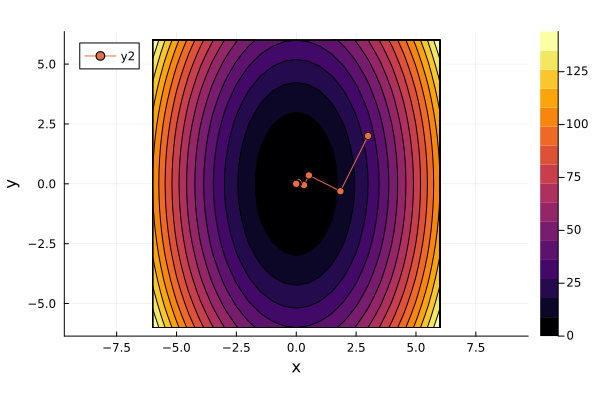

In [13]:
#plot the descent path on top of the contour plot
plot!(xc, yc, markershape = :circle, line = :solid)